# 🧪 **Exercise Fine-tuning Part------->2**

1. Take 3 of your own photos of food and use the trained model to make predictions on them, share your predictions with the other students in Discord and show off your Food Vision model 🍔👁.
2. Train a feature-extraction transfer learning model for 10 epochs on the same data and compare its performance versus a model which used feature extraction for 5 epochs and fine-tuning for 5 epochs (like we've used in this notebook). Which method is better?
3. Recreate the first model (the feature extraction model) with mixed_precision turned on.
4. Does it make the model train faster?
5. Does it effect the accuracy or performance of our model?
6. What's the advantages of using mixed_precision training?

# **Getting Data**

In [44]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [45]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip

--2023-07-14 06:17:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/101_food_classes_10_percent.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 64.233.170.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1625420029 (1.5G) [application/zip]
Saving to: ‘101_food_classes_10_percent.zip.1’

101_food_classes_10 100%[===================>]   1.51G  22.7MB/s    in 71s     

2023-07-14 06:18:59 (21.7 MB/s) - ‘101_food_classes_10_percent.zip.1’ saved [1625420029/1625420029]



In [46]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip

--2023-07-14 06:18:59--  https://storage.googleapis.com/ztm_tf_course/food_vision/custom_food_images.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13192985 (13M) [application/zip]
Saving to: ‘custom_food_images.zip.1’

custom_food_images. 100%[===================>]  12.58M  11.3MB/s    in 1.1s    

2023-07-14 06:19:00 (11.3 MB/s) - ‘custom_food_images.zip.1’ saved [13192985/13192985]



In [47]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip

--2023-07-14 06:19:00--  https://storage.googleapis.com/ztm_tf_course/food_vision/06_101_food_class_10_percent_saved_big_dog_model.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.118.128, 74.125.24.128, 142.251.10.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.118.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46760742 (45M) [application/zip]
Saving to: ‘06_101_food_class_10_percent_saved_big_dog_model.zip.1’

06_101_food_class_1 100%[===================>]  44.59M  12.8MB/s    in 3.7s    

2023-07-14 06:19:04 (12.1 MB/s) - ‘06_101_food_class_10_percent_saved_big_dog_model.zip.1’ saved [46760742/46760742]



In [48]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2023-07-14 06:19:04--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2023-07-14 06:19:04 (115 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [49]:
!unzip 101_food_classes_10_percent

Streaming output truncated to the last 5000 lines.
  inflating: 101_food_classes_10_percent/train/beet_salad/2450020.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/550087.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/3132380.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/44885.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/1967147.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/1422905.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/1380319.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/1336726.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/2808614.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/66574.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/3537144.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/3165387.jpg  
  inflating: 101_food_classes_10_percent/train/beet_salad/3391241.jpg  
  inflating: 101_f

In [50]:
train_dir_10_percent='101_food_classes_10_percent/train'
test_dir='101_food_classes_10_percent/test'

In [51]:
train_data_10_percent=tf.keras.preprocessing.image_dataset_from_directory(train_dir_10_percent,
                                                                          label_mode='categorical',
                                                                          image_size=(224,224),
                                                                          batch_size=32)
test_data=tf.keras.preprocessing.image_dataset_from_directory(test_dir,
                                                              label_mode='categorical',
                                                              image_size=(224,224),
                                                              batch_size=32,
                                                              shuffle=False)

Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [52]:
from helper_functions import walk_through_dir, plot_loss_curves,compare_historys, create_tensorboard_callback,load_and_prep_image,pred_and_plot

In [53]:
walk_through_dir('101_food_classes_10_percent')

There are 2 directories and 0 images in '101_food_classes_10_percent'.
There are 101 directories and 0 images in '101_food_classes_10_percent/test'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/waffles'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/shrimp_and_grits'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/samosa'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/nachos'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/gnocchi'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/chicken_quesadilla'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/spaghetti_carbonara'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/beignets'.
There are 0 directories and 250 images in '101_food_classes_10_percent/test/french_fries'.
There are 0 directories and 250 images in

## **Modelling**

In [54]:
!unzip custom_food_images

Archive:  custom_food_images.zip
replace __MACOSX/._custom_food_images? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._custom_food_images  
  inflating: custom_food_images/hamburger.jpeg  
  inflating: __MACOSX/custom_food_images/._hamburger.jpeg  
  inflating: custom_food_images/steak.jpeg  
  inflating: __MACOSX/custom_food_images/._steak.jpeg  
  inflating: custom_food_images/sushi.jpeg  
  inflating: __MACOSX/custom_food_images/._sushi.jpeg  
  inflating: custom_food_images/chicken_wings.jpeg  
  inflating: __MACOSX/custom_food_images/._chicken_wings.jpeg  
  inflating: custom_food_images/ramen.jpeg  
  inflating: __MACOSX/custom_food_images/._ramen.jpeg  
  inflating: custom_food_images/pizza-dad.jpeg  
  inflating: __MACOSX/custom_food_images/._pizza-dad.jpeg  


In [55]:
!unzip /content/06_101_food_class_10_percent_saved_big_dog_model.zip

Archive:  /content/06_101_food_class_10_percent_saved_big_dog_model.zip
replace __MACOSX/._06_101_food_class_10_percent_saved_big_dog_model? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: __MACOSX/._06_101_food_class_10_percent_saved_big_dog_model  
  inflating: 06_101_food_class_10_percent_saved_big_dog_model/.DS_Store  
  inflating: __MACOSX/06_101_food_class_10_percent_saved_big_dog_model/._.DS_Store  
  inflating: __MACOSX/06_101_food_class_10_percent_saved_big_dog_model/._variables  
  inflating: 06_101_food_class_10_percent_saved_big_dog_model/saved_model.pb  
  inflating: __MACOSX/06_101_food_class_10_percent_saved_big_dog_model/._saved_model.pb  
  inflating: __MACOSX/06_101_food_class_10_percent_saved_big_dog_model/._assets  
  inflating: 06_101_food_class_10_percent_saved_big_dog_model/variables/variables.data-00000-of-00001  
  inflating: __MACOSX/06_101_food_class_10_percent_saved_big_dog_model/variables/._variables.data-00000-of-00001  
  inflating: 06_101_food_class

In [56]:
loaded_model=tf.keras.models.load_model('/content/06_101_food_class_10_percent_saved_big_dog_model')

In [57]:
loaded_model.evaluate(test_data)

790/790 [==============================] - 66s 81ms/step - loss: 1.8027 - accuracy: 0.6078


[1.8027206659317017, 0.6077623963356018]

In [58]:
image=load_and_prep_image('/content/custom_food_images/hamburger.jpeg')

In [59]:
pred=loaded_model.predict(tf.expand_dims(image,axis=0))

1/1 [==============================] - 1s 1s/step


In [60]:
pred.argmax()

64

In [61]:
class_names=test_data.class_names

In [62]:
class_names[64]

'miso_soup'

In [63]:
pred_1=loaded_model.predict(tf.expand_dims(load_and_prep_image('/content/custom_food_images/pizza-dad.jpeg'),axis=0))

1/1 [==============================] - 0s 30ms/step


In [64]:
pred_1.argmax()

64

In [65]:
class_names[64]

'miso_soup'

In [66]:
pred_2=loaded_model.predict(tf.expand_dims(load_and_prep_image('/content/custom_food_images/steak.jpeg'),axis=0))

1/1 [==============================] - 0s 28ms/step


In [67]:
class_names[pred_2.argmax()]

'miso_soup'

Seems like there is something wrong with the model we imported. lets build one of our own using transfer learning

### **Training a feature extraction model for 10 epochs**

In [68]:
from tensorflow.keras.layers.experimental import preprocessing

In [69]:
aug_model=tf.keras.Sequential([
    preprocessing.RandomFlip('horizontal'),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomZoom(0.2)

],name='augmentation_model')

In [80]:
base_model=tf.keras.applications.MobileNet(include_top=False)
inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
base_model.trainable=False
x=aug_model(inputs)
x=base_model(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2d')(x)
outputs=tf.keras.layers.Dense(101, activation='softmax',name='output_layer')(x)
model_1=tf.keras.Model(inputs,outputs)


In [81]:
model_1.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [82]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('checkpoints/model1.ckpt', monitor='val_accuracy',save_best_only=True,
                                                    save_weights_only=True, verbose=1)
initial_epochs=10
history_1=model_1.fit(train_data_10_percent,
                      epochs=initial_epochs,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data,
                      validation_steps=int(0.15*len(test_data)),
                      callbacks=[model_checkpoint,
                                 create_tensorboard_callback('logs/','model_1')])

Saving TensorBoard log files to: logs//model_1/20230714-064508
Epoch 1/10
237/237 [==============================] - ETA: 0s - loss: 4.7357 - accuracy: 0.0277
Epoch 1: val_accuracy improved from -inf to 0.02331, saving model to checkpoints/model1.ckpt
237/237 [==============================] - 42s 166ms/step - loss: 4.7357 - accuracy: 0.0277 - val_loss: 4.5537 - val_accuracy: 0.0233
Epoch 2/10
237/237 [==============================] - ETA: 0s - loss: 4.3240 - accuracy: 0.0626
Epoch 2: val_accuracy improved from 0.02331 to 0.03919, saving model to checkpoints/model1.ckpt
237/237 [==============================] - 40s 168ms/step - loss: 4.3240 - accuracy: 0.0626 - val_loss: 4.4331 - val_accuracy: 0.0392
Epoch 3/10
237/237 [==============================] - ETA: 0s - loss: 4.1665 - accuracy: 0.0862
Epoch 3: val_accuracy improved from 0.03919 to 0.04846, saving model to checkpoints/model1.ckpt
237/237 [==============================] - 44s 182ms/step - loss: 4.1665 - accuracy: 0.0862 - va

In [75]:
model_1.evaluate(test_data)

790/790 [==============================] - 64s 81ms/step - loss: 4.1885 - accuracy: 0.0907


[4.188473224639893, 0.09069307148456573]

## **Another model with 5 epochs + 5 fine-tuning epochs**

In [79]:
base_model_1=tf.keras.applications.MobileNet(include_top=False)
inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
base_model_1.trainable=False
x=aug_model(inputs)
x=base_model_1(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2d')(x)
outputs=tf.keras.layers.Dense(101, activation='softmax',name='output_layer')(x)
model_2=tf.keras.Model(inputs,outputs)

In [83]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

In [84]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('checkpoints/model2.ckpt', monitor='val_accuracy',save_best_only=True,
                                                    save_weights_only=True, verbose=1)
initial_epochs=5
history_2=model_2.fit(train_data_10_percent,
                      epochs=initial_epochs,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data,
                      validation_steps=int(0.15*len(test_data)),
                      callbacks=[model_checkpoint,
                                 create_tensorboard_callback('logs/','model_2')])

Saving TensorBoard log files to: logs//model_2/20230714-065320
Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 4.7134 - accuracy: 0.0314
Epoch 1: val_accuracy improved from -inf to 0.04052, saving model to checkpoints/model2.ckpt
237/237 [==============================] - 33s 126ms/step - loss: 4.7134 - accuracy: 0.0314 - val_loss: 4.5137 - val_accuracy: 0.0405
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 4.3455 - accuracy: 0.0589
Epoch 2: val_accuracy improved from 0.04052 to 0.05614, saving model to checkpoints/model2.ckpt
237/237 [==============================] - 33s 136ms/step - loss: 4.3455 - accuracy: 0.0589 - val_loss: 4.3129 - val_accuracy: 0.0561
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 4.1780 - accuracy: 0.0825
Epoch 3: val_accuracy improved from 0.05614 to 0.06753, saving model to checkpoints/model2.ckpt
237/237 [==============================] - 29s 120ms/step - loss: 4.1780 - accuracy: 0.0825 - val_l

In [85]:
model_2.evaluate(test_data)

790/790 [==============================] - 57s 72ms/step - loss: 4.1794 - accuracy: 0.0859


[4.179415702819824, 0.08586138486862183]

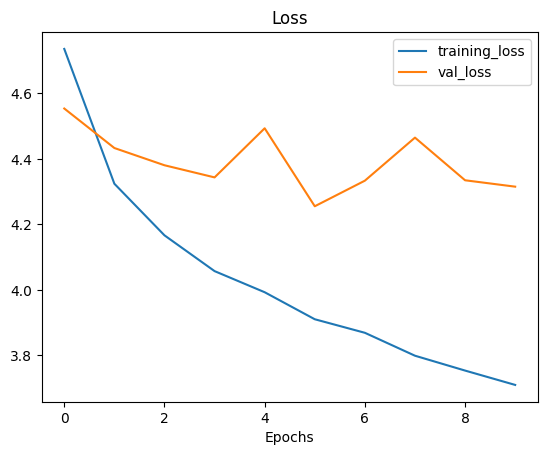

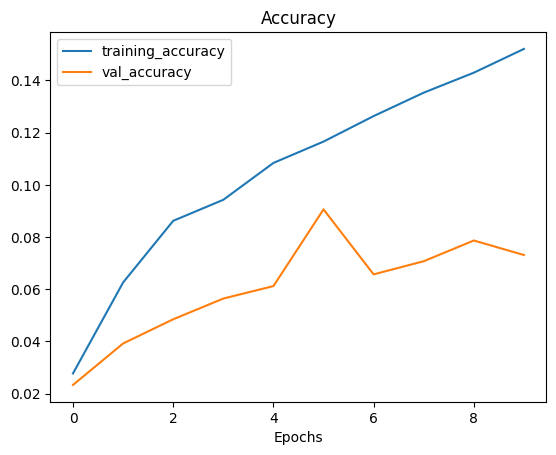

In [86]:
plot_loss_curves(history_1)

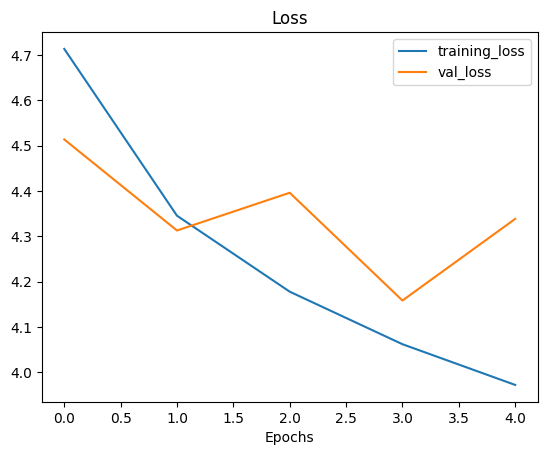

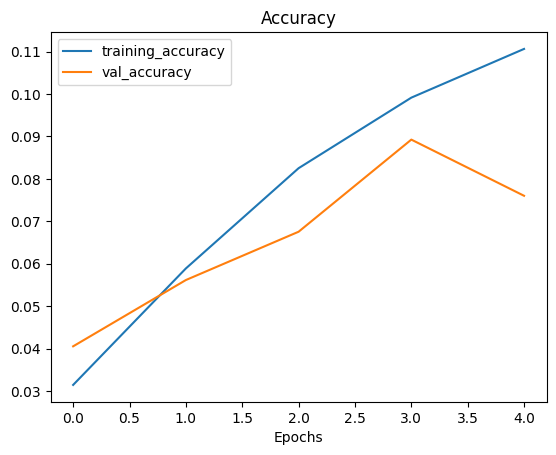

In [87]:
plot_loss_curves(history_2)

In [88]:
base_model_1.trainable=True
for layer in base_model_1.layers[:-5]:
  layer.trainable=False

In [89]:
model_2.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                metrics=['accuracy'])

In [91]:
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('checkpoints/model3.ckpt', monitor='val_accuracy',save_best_only=True,
                                                    save_weights_only=True, verbose=1)
initial_epochs=5
history_3=model_2.fit(train_data_10_percent,
                      epochs=initial_epochs+5,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data,
                      validation_steps=int(0.15*len(test_data)),
                      initial_epoch=history_2.epoch[-1],
                      callbacks=[model_checkpoint,
                                 create_tensorboard_callback('logs/','model_3')])

Saving TensorBoard log files to: logs//model_3/20230714-065818
Epoch 5/10
237/237 [==============================] - ETA: 0s - loss: 3.9665 - accuracy: 0.1090
Epoch 5: val_accuracy improved from -inf to 0.06250, saving model to checkpoints/model3.ckpt
237/237 [==============================] - 36s 132ms/step - loss: 3.9665 - accuracy: 0.1090 - val_loss: 4.3377 - val_accuracy: 0.0625
Epoch 6/10
237/237 [==============================] - ETA: 0s - loss: 3.9178 - accuracy: 0.1158
Epoch 6: val_accuracy improved from 0.06250 to 0.08342, saving model to checkpoints/model3.ckpt
237/237 [==============================] - 30s 123ms/step - loss: 3.9178 - accuracy: 0.1158 - val_loss: 4.2920 - val_accuracy: 0.0834
Epoch 7/10
237/237 [==============================] - ETA: 0s - loss: 3.8644 - accuracy: 0.1238
Epoch 7: val_accuracy improved from 0.08342 to 0.10461, saving model to checkpoints/model3.ckpt
237/237 [==============================] - 29s 121ms/step - loss: 3.8644 - accuracy: 0.1238 - va

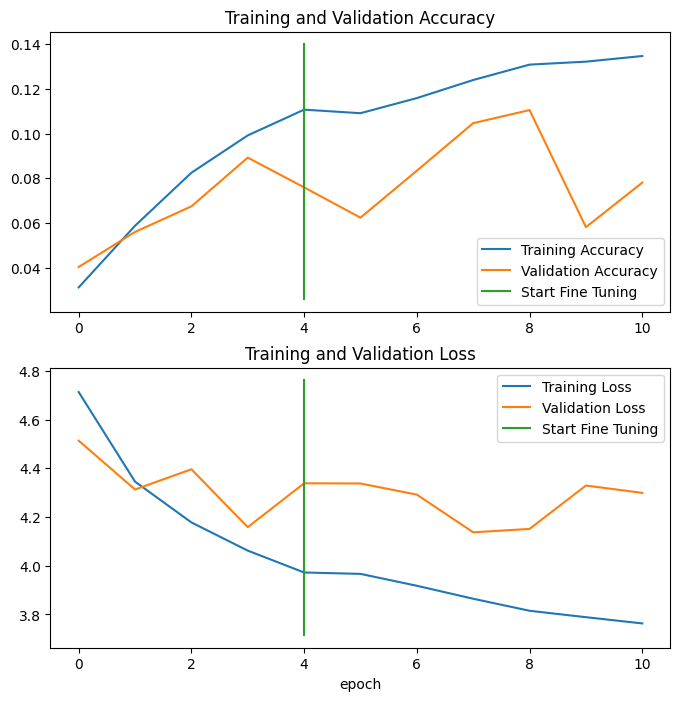

In [92]:
compare_historys(history_2,history_3)

In [95]:
from keras.api._v2.keras import mixed_precision
base_model_3=tf.keras.applications.ResNet50(include_top=False)
inputs=tf.keras.layers.Input(shape=(224,224,3),name='input_layer')
base_model_3.trainable=False
base_model_3.mixed_precision=True
x=aug_model(inputs)
x=base_model_3(x,training=False)
x=tf.keras.layers.GlobalAveragePooling2D(name='global_average_pooling_2d')(x)
outputs=tf.keras.layers.Dense(101, activation='softmax',name='output_layer')(x)
model_4=tf.keras.Model(inputs,outputs)

In [96]:
model_4.compile(loss='categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])
model_checkpoint=tf.keras.callbacks.ModelCheckpoint('checkpoints/model4.ckpt', monitor='val_accuracy',save_best_only=True,
                                                    save_weights_only=True, verbose=1)
initial_epochs=5
history_4=model_4.fit(train_data_10_percent,
                      epochs=initial_epochs,
                      steps_per_epoch=len(train_data_10_percent),
                      validation_data=test_data,
                      validation_steps=int(0.15*len(test_data)),
                      callbacks=[model_checkpoint,
                                 create_tensorboard_callback('logs/','model_4')])

Saving TensorBoard log files to: logs//model_4/20230714-071154
Epoch 1/5
237/237 [==============================] - ETA: 0s - loss: 3.9912 - accuracy: 0.1407
Epoch 1: val_accuracy improved from -inf to 0.20445, saving model to checkpoints/model4.ckpt
237/237 [==============================] - 193s 793ms/step - loss: 3.9912 - accuracy: 0.1407 - val_loss: 3.5716 - val_accuracy: 0.2044
Epoch 2/5
237/237 [==============================] - ETA: 0s - loss: 2.9215 - accuracy: 0.3061
Epoch 2: val_accuracy improved from 0.20445 to 0.32044, saving model to checkpoints/model4.ckpt
237/237 [==============================] - 118s 493ms/step - loss: 2.9215 - accuracy: 0.3061 - val_loss: 3.0147 - val_accuracy: 0.3204
Epoch 3/5
237/237 [==============================] - ETA: 0s - loss: 2.6100 - accuracy: 0.3658
Epoch 3: val_accuracy did not improve from 0.32044
237/237 [==============================] - 97s 408ms/step - loss: 2.6100 - accuracy: 0.3658 - val_loss: 3.3458 - val_accuracy: 0.2860
Epoch 4/

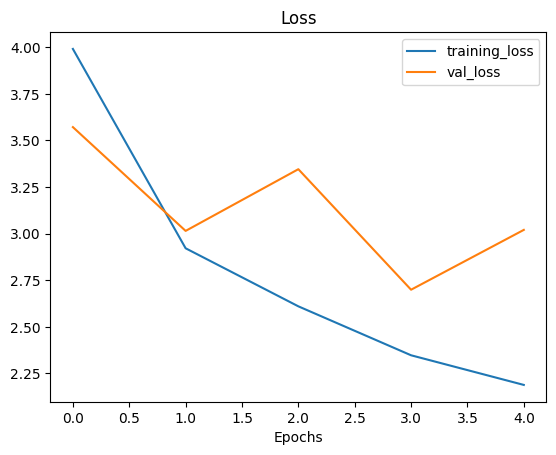

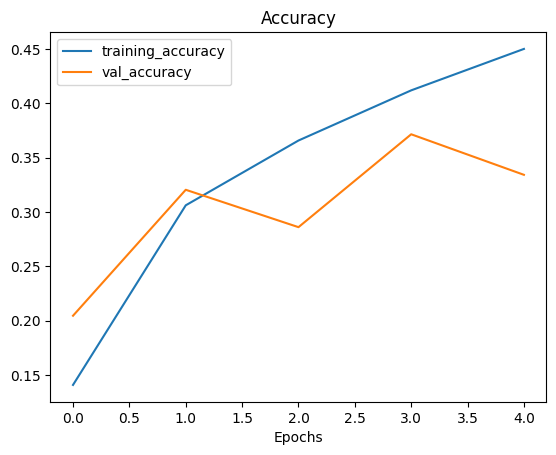

In [97]:
plot_loss_curves(history_4)

so al the models are performing worst, i dont know why.

#**DONE**